# **자기주도PJT - 기본과제**

**Req-1. basic.ipynb 파일을 생 성 한 후 Hello World 를 출력해 보세요**

In [ ]:
print("Hello World")

Hello World


**Req-2. basic.ipynb
파일에 일주일은 몇 초 인지 표시하는 코드를 자유롭게 Colab
에 추가 후 실행해 보세요.**

In [ ]:
seconds_in_a_minute = 60
minutes_in_an_hour = 60
hours_in_a_day = 24
days_in_a_week = 7

seconds_in_a_week = seconds_in_a_minute * minutes_in_an_hour * hours_in_a_day * days_in_a_week

print(f"일주일은 {seconds_in_a_week}초 입니다.")


일주일은 604800초 입니다.


**Req-3. basic.ipynb
파일에 Colab 의 코드 스니펫 창의 다음의 코드들을 추가 후
실행해 보세요**
- Visualization: Linked Brushing in Altair
- Camera Capture 를 추가해 본인의 얼굴을 찍어 보세요
- 추가로 1 개의 코드 스니펫을 자유롭게 선택 하여 올려 놓습니다
실행결과를
그대로 저장해 주세요

In [4]:
# Visualization: Linked Brushing in Altair
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

base = alt.Chart(cars).mark_point().encode(
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

base.encode(x='Acceleration') | base.encode(x='Horsepower')

alt.HConcatChart(...)

In [6]:
# Camera Capture
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


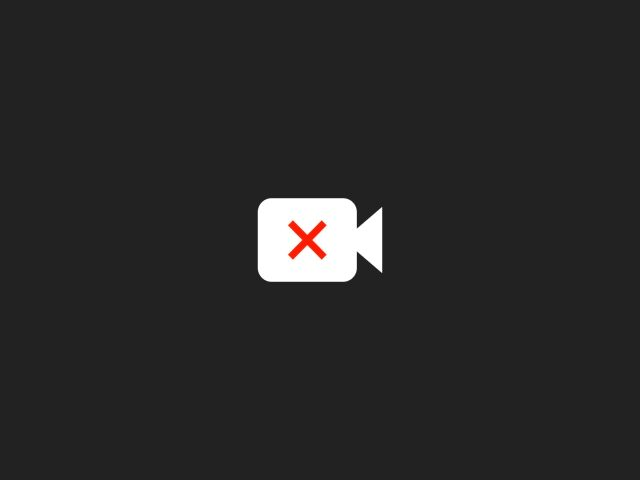

In [7]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [8]:
# Showing CV2 Images
from google.colab.patches import cv2_imshow

For example, here we download and display a PNG image of the Colab logo:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  31925      0 --:--:-- --:--:-- --:--:-- 32156


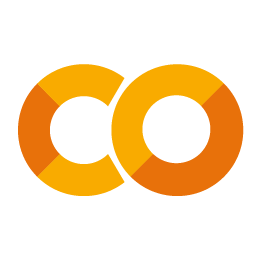

In [9]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

**Req-4. basic.ipynb
파일에 Google Drive 연동을 하는 코드를 추가하고 본인의 구글
드라이브 에 임의의 텍스트파일을 저장하는 코드를 작성해보세요 코드
스니펫 의 Mounting Google Drive in your VM 을 사용해도 무방합니다.**

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

# 구글 드라이브에 텍스트 파일 저장
with open('/content/drive/My Drive/testfile.txt', 'w') as f:
    f.write('This is a test file.')


**Req-5. 다음의 GPU가속 예제코드를 실행해 보고 CPU 사용시 처리시간과 GPU 사용시 처리시간을 비교해 보고 마지막 블럭인“Observe TensorFlow speedup on GPU relative to CPU“의 결과를 복사해서 basic.ipynb의 Req-5 다음에 텍스트 형태로 붙여 주세요.**   
 ☞ https://colab.research.google.com/notebooks/gpu.ipynb


Req.5의 실행결과는 다음과 같습니다.

```python
Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
5.013971502999993
GPU (s):
0.10666817799994988
GPU speedup over CPU: 47x
```


**Req-6. basic.ipynb
파일에 matplotlib 와 OpenCV 의 Drawing API 를 이용하여
화면에 여러 가지 도 형을 그려주는 코드를 작성해 보세요. (난이도 쉬움)**

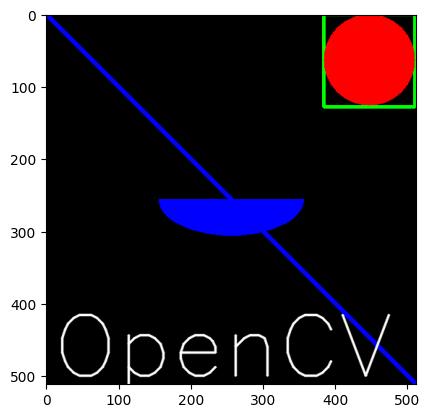

In [11]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 빈 이미지 생성
image = np.zeros((512, 512, 3), np.uint8)

# 도형 그리기
cv2.line(image, (0, 0), (511, 511), (255, 0, 0), 5)
cv2.rectangle(image, (384, 0), (510, 128), (0, 255, 0), 3)
cv2.circle(image, (447, 63), 63, (0, 0, 255), -1)
cv2.ellipse(image, (256, 256), (100, 50), 0, 0, 180, 255, -1)

# 텍스트 추가
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(image, 'OpenCV', (10, 500), font, 4, (255, 255, 255), 2, cv2.LINE_AA)

# 이미지 출력
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
